In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
data.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [5]:
data.dropna(inplace=True)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

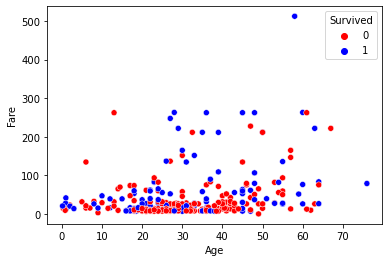

In [18]:
color_dict = {0: "red", 1: "blue", 2: "green"}
sns.scatterplot(x='Age',y='Fare',data=data,hue=data['Survived'],palette=color_dict)

In [19]:
x= data[['Age','Fare']]
y=data['Survived']

# Train test split

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# MinMax Scaller

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit the scaler to the train set ,it will learn the parameter
scaler.fit(x_train)

#transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [23]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [24]:
x_train.describe()

,Age,Fare
count,231.000000,231.000000
mean,29.373377,35.594914
std,13.819580,48.207630
min,0.830000,0.000000
25%,21.000000,8.050000
50%,27.000000,15.245800
75%,36.000000,36.877100
max,67.000000,263.000000


In [25]:
np.round(x_train_scaled.describe(),1)

,Age,Fare
count,231.0,231.0
mean,0.4,0.1
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.0
50%,0.4,0.1
75%,0.5,0.1
max,1.0,1.0


Text(0.5, 1.0, 'After Scalling')

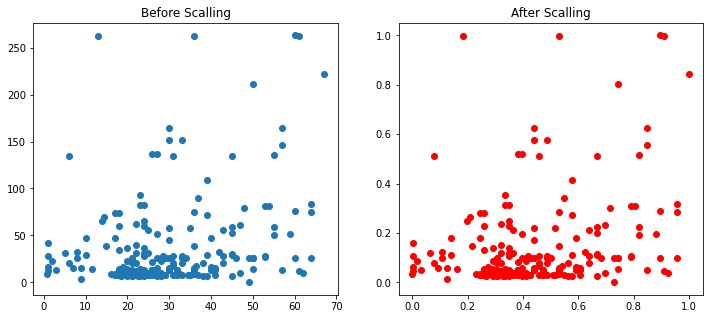

In [26]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['Fare'])
ax1.set_title("Before Scalling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['Fare'],color='red')
ax2.set_title("After Scalling")

In [27]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_scaled =LogisticRegression()

lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

y_pred= lr.predict(x_test)
y_pred_scaled= lr_scaled.predict(x_test_scaled)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.63
scaled 0.63


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)
y_pred= dt.predict(x_test)
y_pred_scaled= dt_scaled.predict(x_test_scaled)

In [31]:
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.61
scaled 0.65


# MaxAbs Scalling

In [32]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

#fit the scaler to the train set ,it will learn the parameter
scaler.fit(x_train)

#transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [33]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [34]:
x_train.describe()

,Age,Fare
count,231.000000,231.000000
mean,29.373377,35.594914
std,13.819580,48.207630
min,0.830000,0.000000
25%,21.000000,8.050000
50%,27.000000,15.245800
75%,36.000000,36.877100
max,67.000000,263.000000


In [37]:
np.round(x_train_scaled.describe(),1)

,Age,Fare
count,231.0,231.0
mean,0.4,0.1
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.0
50%,0.4,0.1
75%,0.5,0.1
max,1.0,1.0


Text(0.5, 1.0, 'After Scalling')

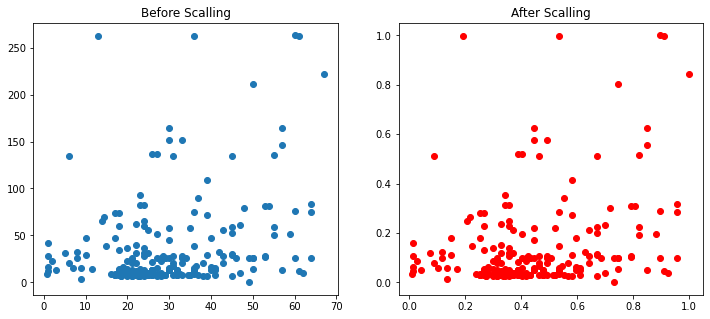

In [38]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['Fare'])
ax1.set_title("Before Scalling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['Fare'],color='red')
ax2.set_title("After Scalling")

In [39]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_scaled =LogisticRegression()

lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

y_pred= lr.predict(x_test)
y_pred_scaled= lr_scaled.predict(x_test_scaled)
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.63
scaled 0.63


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)
y_pred= dt.predict(x_test)
y_pred_scaled= dt_scaled.predict(x_test_scaled)
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.64
scaled 0.6


# Robust Scalling

In [41]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

#fit the scaler to the train set ,it will learn the parameter
scaler.fit(x_train)

#transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [42]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [43]:
x_train.describe()

,Age,Fare
count,231.000000,231.000000
mean,29.373377,35.594914
std,13.819580,48.207630
min,0.830000,0.000000
25%,21.000000,8.050000
50%,27.000000,15.245800
75%,36.000000,36.877100
max,67.000000,263.000000


In [44]:
np.round(x_train_scaled.describe(),1)

,Age,Fare
count,231.0,231.0
mean,0.2,0.7
std,0.9,1.7
min,-1.7,-0.5
25%,-0.4,-0.2
50%,0.0,0.0
75%,0.6,0.8
max,2.7,8.6


Text(0.5, 1.0, 'After Scalling')

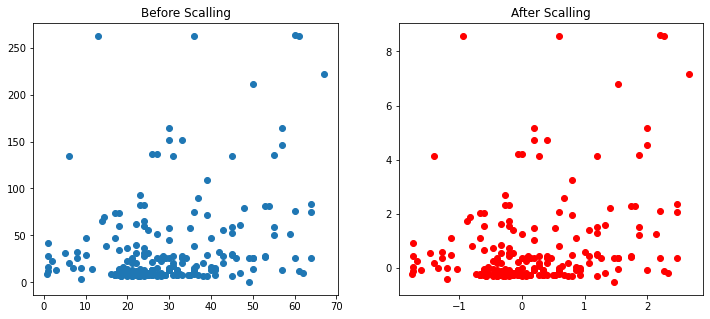

In [45]:
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['Fare'])
ax1.set_title("Before Scalling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['Fare'],color='red')
ax2.set_title("After Scalling")

In [46]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr_scaled =LogisticRegression()

lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

y_pred= lr.predict(x_test)
y_pred_scaled= lr_scaled.predict(x_test_scaled)
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.63
scaled 0.63


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)
y_pred= dt.predict(x_test)
y_pred_scaled= dt_scaled.predict(x_test_scaled)
print("actual",accuracy_score(y_test,y_pred))
print("scaled",accuracy_score(y_test,y_pred_scaled))

actual 0.63
scaled 0.64


## now we can see there is no disadvantage of applying normalization technique but on the other hand it also increase its accrucy , its completly depned on the problem on which we are working on